In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

In [3]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset 1 

In [4]:
Dataset1 = pd.read_csv(r"C:\Users\HP\Downloads\news (1).csv")

In [5]:
Dataset1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [6]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
Dataset1.isnull().sum()
# no null value in dataset 

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

C:\Users\HP\AppData\Local\Temp\ipykernel_6868\3616711757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\HP\AppData\Local\Temp\ipykernel_6868\3616711757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [9]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
##  Applying the wordpre method to the dataset
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

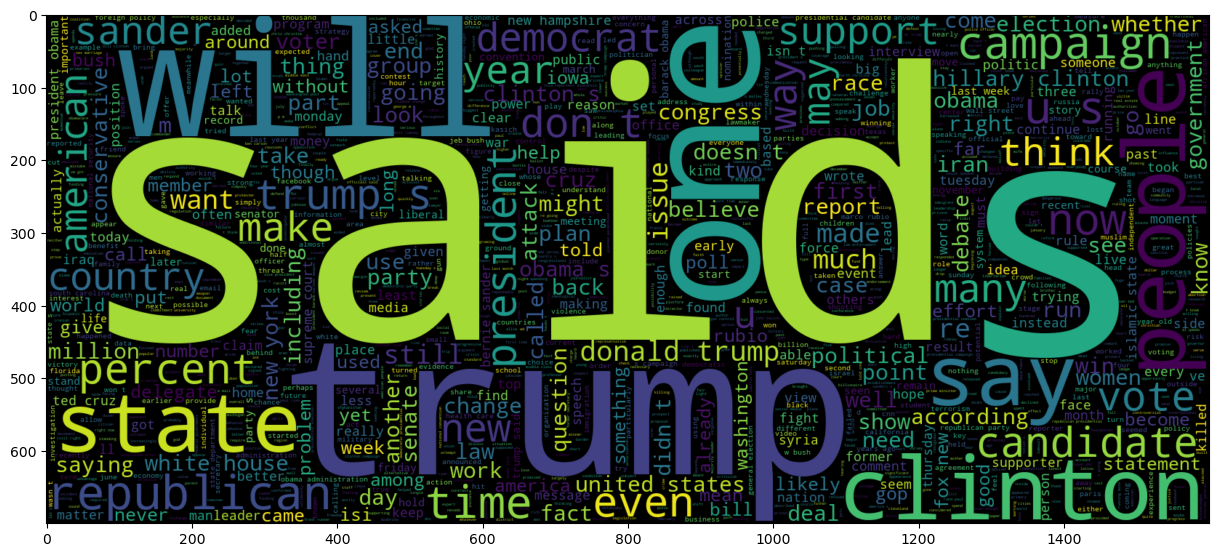

In [11]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

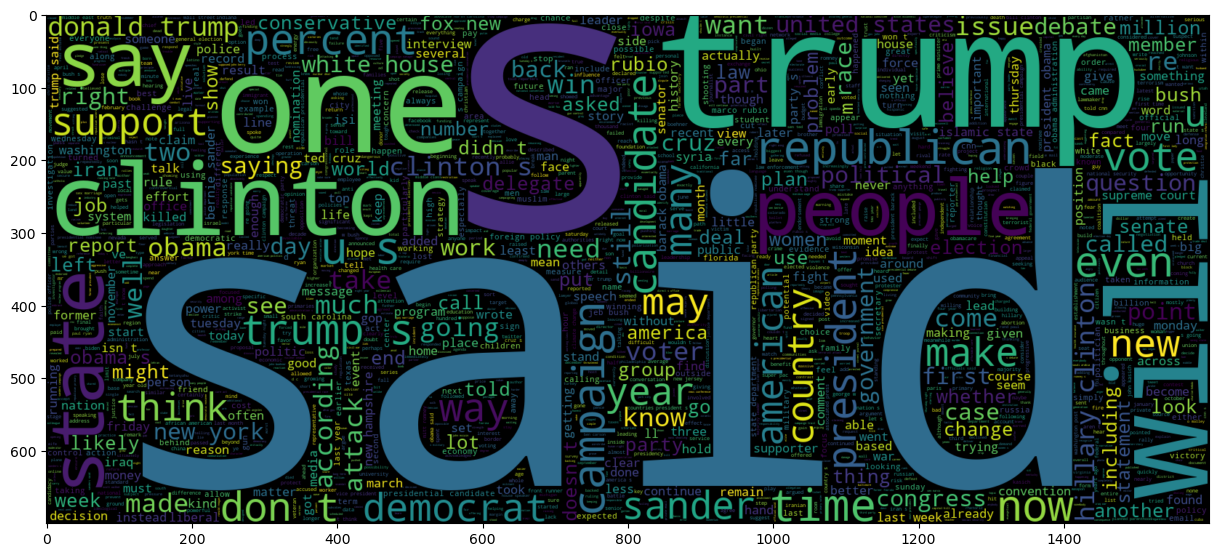

In [12]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

# dataset 2

In [13]:
Dataset2_true = pd.read_csv(r"C:\Users\HP\Downloads\True.csv")
Dataset2_fake = pd.read_csv(r"C:\Users\HP\Downloads\Fake.csv")

In [14]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [15]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [16]:
# Counting by Subjects in Real news
for key, count in Dataset2_true.subject.value_counts().items():
    print(f"{key}:\t{count}")

# Getting Total Rows
total_rows = Dataset2_true.shape[0]
print(f"Total Rows: {total_rows}")

politicsNews:	11272
worldnews:	10145
Total Rows: 21417


In [17]:
# Counting by Subjects in Fake news
for key,count in Dataset2_fake.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
total_rows = Dataset2_fake.shape[0]
print(f"Total Rows: {total_rows}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Rows: 23481


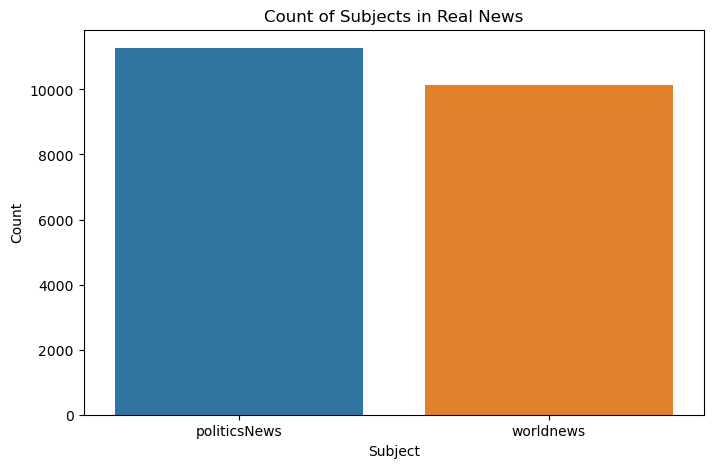

In [18]:
#ploting the Subjects in Real news
plt.figure(figsize=(8, 5))
sns.countplot(x="subject", data=Dataset2_true)  # Use x parameter for the column name
plt.title("Count of Subjects in Real News")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.show()

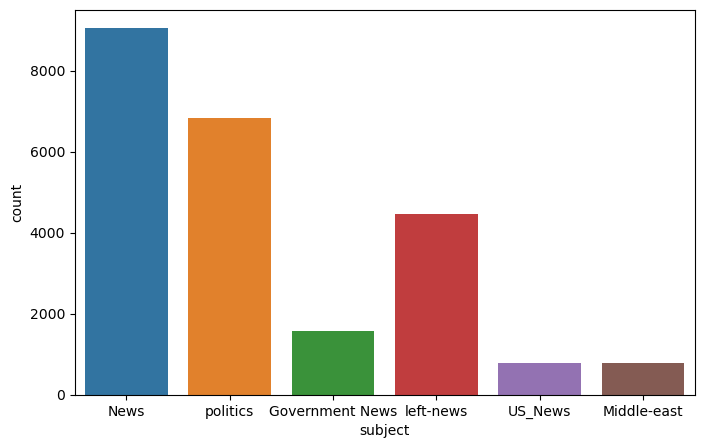

In [19]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot(x ="subject", data=Dataset2_fake)
plt.show()

In [20]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [21]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [22]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

In [23]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

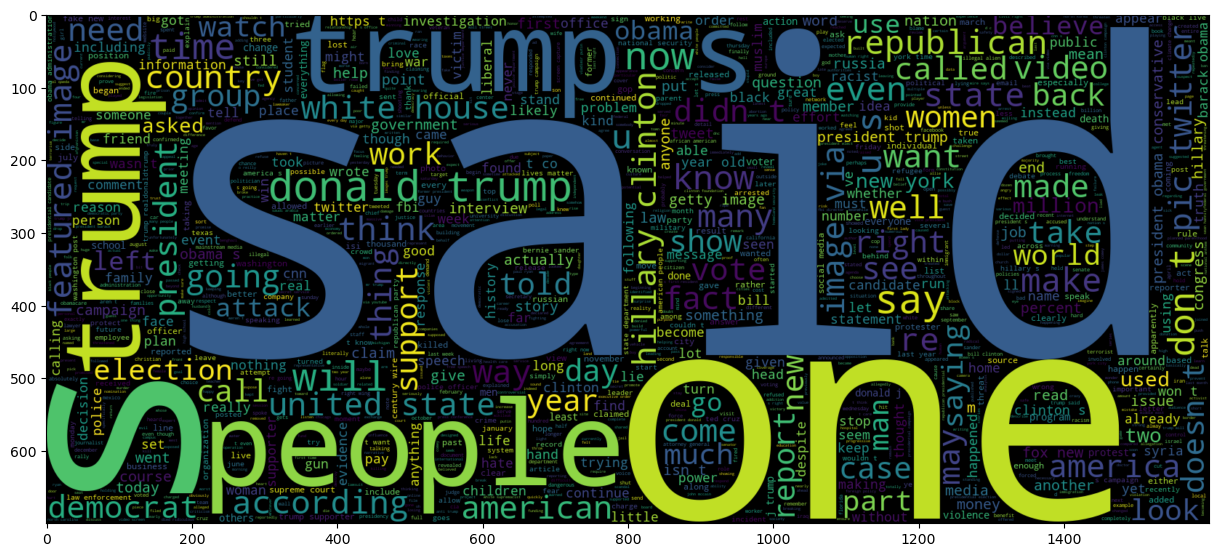

In [24]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Dataset 3

In [25]:
Dataset3_real = pd.read_csv(r"C:\Users\HP\Downloads\politifact_real (2).csv")
Dataset3_fake = pd.read_csv(r"C:\Users\HP\Downloads\politifact_fake.csv")

In [26]:

Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [27]:

##  Applying the wordpre method to the dataset
Dataset3['Article']=Dataset3['Article'].apply(wordpre)

In [28]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

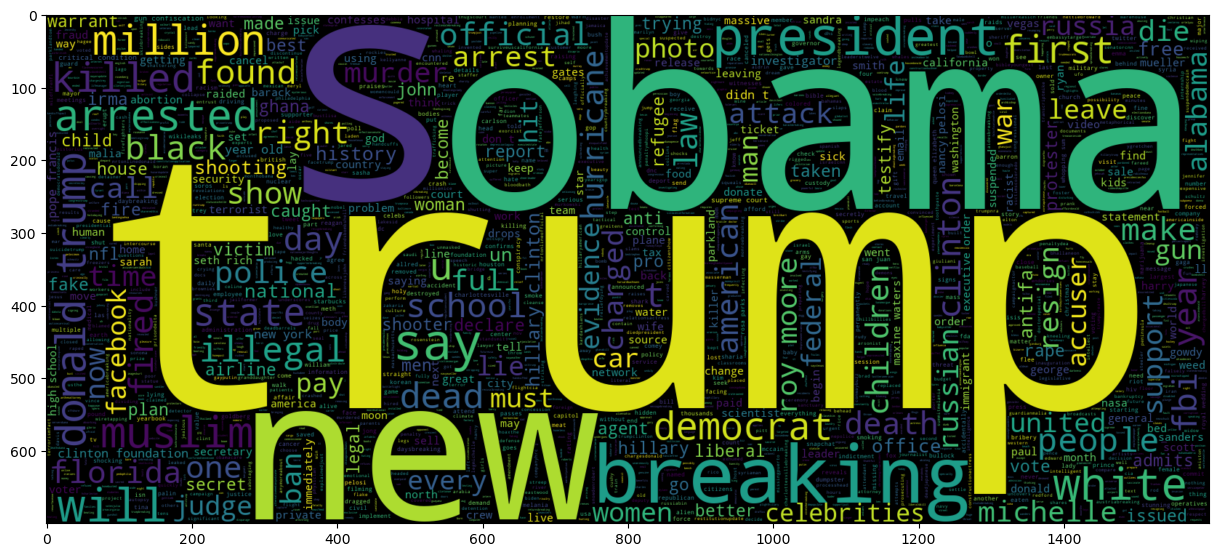

In [29]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Dataset 4

In [30]:
Dataset4 = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")

In [31]:
Dataset4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [32]:
Dataset4["Article"] = Dataset4["title"] + Dataset4["text"]
Dataset4.sample(frac = 1) #Shuffle 100%

Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [33]:

##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

In [34]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [35]:

#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [36]:
#combining all the datset into one
frames = [Dataset1, Dataset2, Dataset3, Dataset4]
Dataset = pd.concat(frames, ignore_index=True)

In [37]:

Dataset.shape

(72492, 2)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=42)

In [39]:

x_train.shape

(57993,)

In [40]:

x_test.shape

(14499,)

In [41]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report

In [43]:
pipe = Pipeline([
    ('vect', CountVectorizer()),          
    ('tfidf', TfidfTransformer()),     
    ('model', LogisticRegression())   ])  


In [44]:
# Fit the model
Logisticmodel = pipe.fit(x_train, y_train)

In [45]:
# Make predictions
prediction = Logisticmodel.predict(x_test)

In [46]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: {}%".format(round(accuracy * 100, 2)))

# Store accuracy in a variable
Logisticmodel_accuracy = round(accuracy * 100, 2)

Accuracy: 87.05%


In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7505
           1       0.88      0.85      0.86      6994

    accuracy                           0.87     14499
   macro avg       0.87      0.87      0.87     14499
weighted avg       0.87      0.87      0.87     14499



# Decision tree

In [48]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

In [49]:
DecisionTreemodel = pipe.fit(x_train, y_train)

In [50]:
# Make predictions
prediction = DecisionTreemodel.predict(x_test)

In [51]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.59%


# Stochastic Gradient Descent

In [52]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

In [53]:
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)

In [54]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 86.47%


# GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Create a pipeline with updated loss parameter
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', GradientBoostingClassifier(
        loss='log_loss',  # Updated from 'deviance' to 'log_loss'
        learning_rate=0.01,
        n_estimators=10,
        max_depth=5,
        random_state=55
    ))
])

In [56]:
GBCmodel = pipe.fit(x_train, y_train)

In [57]:
prediction = GBCmodel.predict(x_test)

In [58]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.95%


# XGBClassifier

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from xgboost import XGBClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', XGBClassifier(objective='binary:logistic',
                             learning_rate=0.01,
                             n_estimators=10,
                             max_depth=5,
                             random_state=2020))
])

In [61]:
xgboostmodel = pipe.fit(x_train, y_train)

In [62]:
prediction = xgboostmodel.predict(x_test)

In [63]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.92%


# Multinomial Naive Bayes Classifier

In [64]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

In [65]:
BNBCmodel = pipe.fit(x_train, y_train)

In [66]:
prediction = BNBCmodel.predict(x_test)

In [67]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 76.41%


In [68]:
import matplotlib.pyplot as plt

# Define accuracy values for each model (replace these with your actual accuracy values)
SDGmodel_accuracy = 0.85  # Example accuracy value for Stochastic Gradient Descent model
Logisticmodel_accuracy = 0.90  # Example accuracy value for Logistic Regression model
GBCmodel_accuracy = 0.88  # Example accuracy value for Gradient Boosting Classifier
xgboostmodel_accuracy = 0.92  # Example accuracy value for XGBoost model
DecisionTreemodel_accuracy = 0.87  # Example accuracy value for Decision Tree model
RandomForestmodel_accuracy = 0.91  # Example accuracy value for Random Forest model
Multinomial_Naive_Bayes_accuracy = 0.84  # Example accuracy value for Multinomial Naive Bayes model
Bernoulli_Naive_Bayes_accuracy = 0.83  # Example accuracy value for Bernoulli Naive Bayes model

# Model names
x = [
    "SDGmodel_accuracy", 
    "Logisticmodel_accuracy", 
    "GBCmodel_accuracy", 
    "xgboostmodel_accuracy", 
    "DecisionTreemodel_accuracy", 
    "RandomForestmodel_accuracy", 
    "Multinomial_Naive_Bayes_accuracy",
    "Bernoulli_Naive_Bayes_accuracy"
]

# Accuracy values
y = [
    SDGmodel_accuracy, 
    Logisticmodel_accuracy, 
    GBCmodel_accuracy, 
    xgboostmodel_accuracy,
    DecisionTreemodel_accuracy, 
    RandomForestmodel_accuracy, 
    Multinomial_Naive_Bayes_accuracy,
    Bernoulli_Naive_Bayes_accuracy
]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.barh(x, y, color='skyblue')  # Optional: Set the color of the bars
plt.xlabel('Accuracy')  # Label for the x-axis
plt.title('Model Accuracies')  # Title of the chart
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 for accuracy
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better readability
plt.show()  # Display the chart

In [69]:
import joblib

# Assuming Logisticmodel is already trained and ready
# Save the trained model as a pickle file
joblib.dump(Logisticmodel, 'model.pkl')

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl


In [70]:
# Absolute path to model.pkl
model = joblib.load(r'C:\Users\HP\OneDrive\文档\python vs code\fakenews.py\model.pkl')


In [71]:

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datetime import datetime, timedelta

# Get the date 7 days ago
seven_days_ago = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')
today = datetime.now().strftime('%Y-%m-%d')

# URL with Date Range
url = (f'https://newsapi.org/v2/everything?'
       f'q=technology&'
       f'from={seven_days_ago}&'
       f'to={today}&'
       f'sortBy=popularity&'
       f'apiKey=5cb35f331b9246daa153e1e4d42d740d')



In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming the fetched news data from your API
# Sample data format from API
news_data = [
    {'source': 'wired', 'author': 'Umair Irfan', 'title': "Grid-Scale Battery Storage Is Quietly Revolutionizing Energy", 'description': "This energy storage technology is harnessing the power of batteries...", 'label': 1},
    {'source': 'wired', 'author': 'Jorge Garay', 'title': "The Tech That Safeguards the Conclave’s Secrecy", 'description': "Following the death of Pope Francis, the Vatican embraces new technology...", 'label': 0},
    {'source': 'wired', 'author': 'Ben Dowsett', 'title': "This Massive Screen for Live Sports Puts You in the Game", 'description': "Cosm’s venues provide a fully immersive live sports experience...", 'label': 0},
    {'source': 'wired', 'author': 'Brenda Stolyar', 'title': "22 Best MacBook Accessories (2025), Tested and Reviewed", 'description': "From charging adapters to external monitors, we tested the best...", 'label': 0},
    {'source': 'the-verge', 'author': 'Sheena Vasani', 'title': "The Kindle Colorsoft, Amazon’s first color e-reader, is here", 'description': "Built with E Ink’s color display technology, the Kindle Colorsoft is a game changer...", 'label': 1}
]

# Create DataFrame from the news data
df = pd.DataFrame(news_data)

# Combine title and description for vectorization
df['text'] = df['title'] + " " + df['description']

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the text data
X = vectorizer.fit_transform(df['text'])

# Define the target variable (labels)
y = np.array(df['label'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Get predictions for all news articles
all_articles = df['text'].values
article_predictions = model.predict(vectorizer.transform(all_articles))

# Function to manually verify predictions
def manual_tester(article, predicted_label):
    print("\nArticle Title: ", article)
    print("Prediction: ", "Real" if predicted_label == 1 else "Fake")
    user_input = input("Is this prediction correct? (y/n): ")
    if user_input.lower() == 'n':
        correct_label = input("Enter correct label (Real=1 / Fake=0): ")
        return int(correct_label)
    return predicted_label

# Process each article and allow manual verification
corrected_labels = []
for i, article in enumerate(all_articles):
    prediction = article_predictions[i]
    corrected_label = manual_tester(article, prediction)
    corrected_labels.append(corrected_label)

# Update DataFrame with corrected labels
df['manual_label'] = corrected_labels

# Show the final results
print("\nFinal Articles with Manual Verification:")
print(df[['title', 'manual_label']])


Model Accuracy: 0.00%

Article Title:  Grid-Scale Battery Storage Is Quietly Revolutionizing Energy This energy storage technology is harnessing the power of batteries...
Prediction:  Real

Article Title:  The Tech That Safeguards the Conclave’s Secrecy Following the death of Pope Francis, the Vatican embraces new technology...
Prediction:  Real

Article Title:  This Massive Screen for Live Sports Puts You in the Game Cosm’s venues provide a fully immersive live sports experience...
Prediction:  Fake

Article Title:  22 Best MacBook Accessories (2025), Tested and Reviewed From charging adapters to external monitors, we tested the best...
Prediction:  Fake

Article Title:  The Kindle Colorsoft, Amazon’s first color e-reader, is here Built with E Ink’s color display technology, the Kindle Colorsoft is a game changer...
Prediction:  Real


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import joblib

# Assuming Logisticmodel is already trained and ready
# Save the trained model as a pickle file
joblib.dump(Logisticmodel, 'model.pkl')

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl
